In [7]:
import matplotlib as mpl
import pandas as pd
import numpy as np

import seaborn as sns
from scipy.spatial import ConvexHull

import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [8]:
#read dataset as df
#df = pd.read_csv('./MT_Data/edgedata.csv')
df2 = pd.read_csv('./MT_Data/zeta_omega_threeTerms_newnodesdat_1st.csv')
#df_original
#df_new_dataset


In [9]:
#get valid data from the dataset
zeta = np.array(df_original.new_z)
omega_ratio = np.array(df_original.new_omega)
#power = np.array(df_original.power)
#zeta

In [10]:
#get valid data from the dataset
zeta2 = np.array(df2.zeta)
omega_ratio2 = np.array(df2.omega_ratio)
power2 = np.array(df2.power)
#zeta2

In [11]:
#reshape 1D vec -> 2D matrix

#dimension of sz
sz = int(np.sqrt(len(zeta2)))

z = zeta2.reshape(sz,sz)
OR = omega_ratio2.reshape(sz,sz)
P = power2.reshape(sz,sz)
#P

       new_z  new_omega
0   0.034936   0.947372
1   0.082972   0.947372
2   0.082972   0.918443
3   0.135000   0.947372
4   0.135000   0.918443
5   0.135000   0.885000
6   0.135000   0.877995
7   0.255743   0.947372
8   0.255743   0.918443
9   0.437698   0.947372
10  0.437698   0.918443
11  0.437698   0.885000
12  0.437698   0.877995
13  0.437698   0.716925
14  0.453200   0.947372
15  0.453200   0.918443
16  0.453200   0.885000
17  0.453200   0.877995
18  0.453200   0.716925
0   0.010000   0.960000
1   0.035000   0.960000
2   0.060000   0.935000
3   0.085000   0.935000
4   0.110000   0.910000
5   0.135000   0.910000
6   0.160000   0.860000
7   0.185000   0.885000
8   0.210000   0.860000
9   0.235000   0.810000
10  0.260000   0.810000
11  0.285000   0.835000
12  0.310000   0.835000
13  0.335000   0.835000
14  0.360000   0.835000
15  0.385000   0.810000
16  0.410000   0.835000
17  0.435000   0.610000
18  0.460000   0.610000
19  0.485000   0.585000
20  0.510000   0.585000
21  0.535000   0

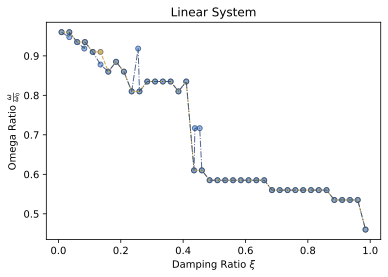

In [12]:
#change the textlabel
#combine the plot
Prj_z = []
Prj_omega = []

plt.xlabel( r"Damping Ratio $\xi$")
plt.ylabel(r"Omega Ratio $\frac{\omega}{\omega_{0}}$")
plt.title('Linear System')

#colors_palatte = ['#6a6b62','#64655c','#707168','#7b7d73','#75776d','#87897f','#818379','#8d8f85','#989b90','#92958a','#9ea096','#a4a69c','#a9aca1','#afb2a7','#b5b8ad','#bbbeb3','#cac4b9','#c6cab3','#ccd0c4','#d2d6ca']
#my_cmap=mpl.colors.ListedColormap(colors_palatte)
#plt.cm.register_cmap(name='mycmp',cmap=my_cmap)

#p_im = plt.contourf(z,OR,P,cmap =plt.cm.get_cmap('mycmp'),alpha=0.6)

for i in range(0,sz):
    for j in range(0,sz):
        if abs(P[i,j]) <= 0.025:
            if OR[i,j]>0.4:
                if z[i,j]<=1:
                    Prj_z = np.append(Prj_z,z[i,j])
                    Prj_omega = np.append(Prj_omega,OR[i,j])

df_zOR = pd.DataFrame({'new_z':Prj_z,'new_omega':Prj_omega })
edge_df = df_zOR.groupby('new_z').min('new_omega')

#edge_df.to_csv('edgedata.csv', index='False')

df_zOR_new = pd.concat([df_zOR,df])
edge_df_new = df_zOR_new.groupby('new_z').min('new_omega')
edge_df_new.to_csv('edgedata-.csv', index='False')

#edge_Df
z_coord = zeta
z_coord2 = np.array(edge_df_new.index)

#z_cood
omega_coord = omega_ratio
omega_coord2 = np.array(edge_df_new.new_omega)

print(df_zOR_new)
print(edge_df_new)

edge_im = plt.scatter(z_coord, omega_coord, c="#cba74e" ,edgecolor = "#5b503f", alpha=0.7, marker = '.',s = 100)
edge_lane=plt.plot(z_coord, omega_coord,c= "#cba74e",alpha=1, linewidth=1,linestyle = 'dashed')


edge_im2 = plt.scatter(z_coord2, omega_coord2, c="#6ba0e2" ,edgecolor = "#234175", alpha=0.7, marker = '.',s = 100)
edge_lane2=plt.plot(z_coord2, omega_coord2,c= "#234175",alpha=0.8, linewidth=1,linestyle = 'dashdot')

#plt.savefig('edge_extension_2st_iter.svg',format='svg',dpi=600)
plt.show()